<a href="https://colab.research.google.com/github/laxmidc423/laxmidc423/blob/main/Graph_without_node.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏥 Nearest Hospital: Surya Sahyadri Hospital
📏 Distance: 0.15 km
🛤️ Shortest Path: Kasba Peth → Surya Sahyadri Hospital


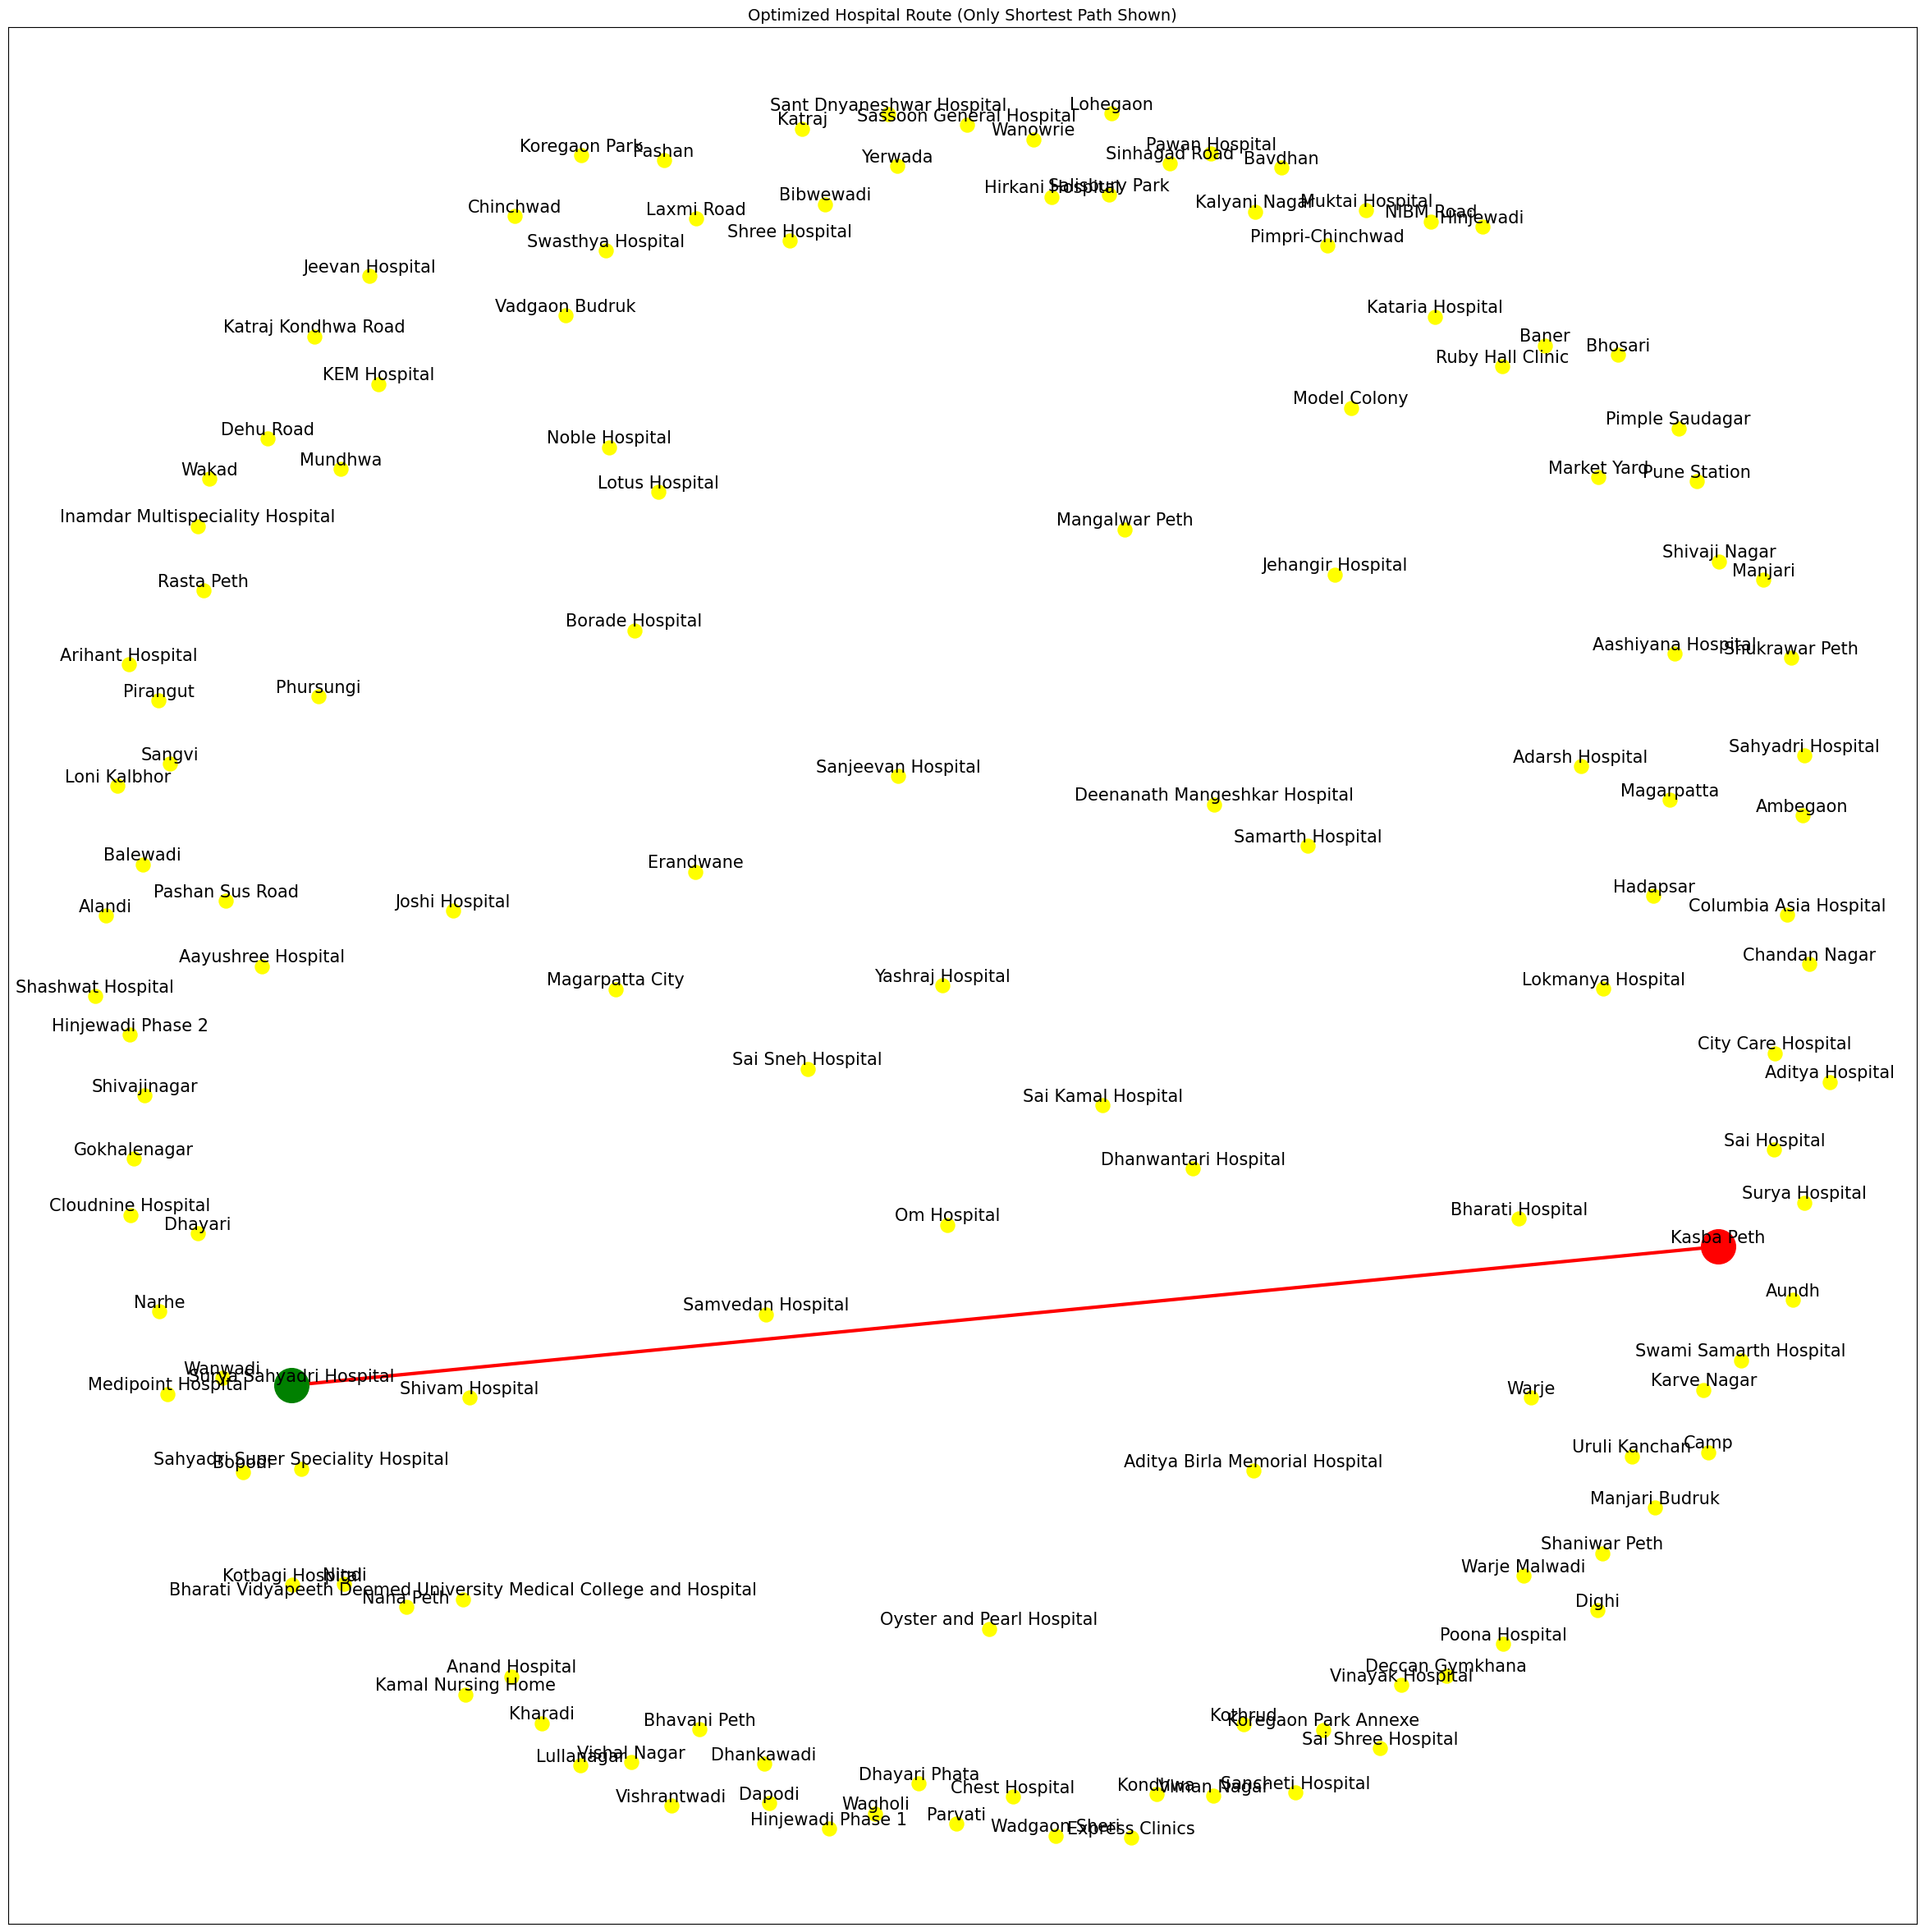

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load dataset
df = pd.read_csv("Hospitals_in_Pune_dataset.csv")

# ✅ Construct graph
graph = nx.Graph()
for index, row in df.iterrows():
    src = row["Location_of_Patient"]
    dst = row["Final_Destination_Nearest_Hospital"]
    weight = row["Distance_km"] / row["Traffic_Level_Percentage"]
    graph.add_edge(src, dst, weight=round(weight, 2))

# ✅ Dijkstra's Algorithm to find the shortest path
def dijkstra(graph, start, end):
    import heapq
    queue = [(0, start, [])]
    visited = set()
    while queue:
        (cost, node, path) = heapq.heappop(queue)
        if node in visited:
            continue
        path = path + [node]
        if node == end:
            return cost, path
        visited.add(node)
        for neighbor in graph.neighbors(node):
            weight = graph[node][neighbor]["weight"]
            heapq.heappush(queue, (cost + weight, neighbor, path))
    return None, []

# ✅ Get user input
initial_location = input("Enter your location: ")
if initial_location not in graph:
    print("❌ Location not found in dataset.")
else:
    # Find nearest hospital using Dijkstra
    nearest_hospital, min_distance, shortest_path = None, float('inf'), []
    for hospital in graph.nodes():
        if hospital == initial_location:
            continue
        distance, path = dijkstra(graph, initial_location, hospital)
        if distance is not None and distance < min_distance:
            nearest_hospital, min_distance, shortest_path = hospital, distance, path

    # ✅ Display shortest path details
    print(f"🏥 Nearest Hospital: {nearest_hospital}")
    print(f"📏 Distance: {round(min_distance, 2)} km")
    print(f"🛤️ Shortest Path: {' → '.join(shortest_path)}")

    # ✅ Draw only the nodes with clear names
    plt.figure(figsize=(25, 25))
    pos = nx.spring_layout(graph, seed=42, k=1.5)

    # ✅ Adjust label positions by shifting them
    label_pos = {node: (x, y + 0.05) for node, (x, y) in pos.items()}  # Shift text upwards

    # ✅ Draw all nodes (locations and hospitals)
    nx.draw_networkx_nodes(graph, pos, node_size=150, node_color="yellow")
    nx.draw_networkx_labels(graph, label_pos, font_size=9, font_weight="normal")  # Adjusted positions

    # ✅ Draw only the shortest path
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color="red", width=3)

    # ✅ Highlight start (red) and hospital (green)
    nx.draw_networkx_nodes(graph, pos, nodelist=[shortest_path[0]], node_color="red", node_size=900, label="Start")
    nx.draw_networkx_nodes(graph, pos, nodelist=[shortest_path[-1]], node_color="green", node_size=900, label="Nearest Hospital")

    plt.title("Optimized Hospital Route (Only Shortest Path Shown)", fontsize=14)
    plt.show()
